In [5]:
### imports 
import pandas as pd 
from PIL import Image
import numpy as np
import os

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19

In [75]:
def get_model_input(img_title):
    img = Image.open(img_title).convert("RGB")
    img = img.resize((128,128))
    img = np.asarray(img)
    return img.reshape((1,128,128,3))
test = get_model_input("O_3.jpg")
type(test)

numpy.ndarray

In [74]:
labels = ["organic", "recyclable"]
# use an image of your choice and upload it then read it here
organic_test_img = Image.open("O_2.jpg")
recycle_test_img = Image.open("R__2.jpg")
test = Image.open("O_3.jpg").convert("RGB")
organic_test_img = organic_test_img.convert("RGB")
recycle_test_img = recycle_test_img.convert("RGB")

organic_test_img = organic_test_img.resize((128,128))
recycle_test_img = recycle_test_img.resize((128,128))
test = test.resize((128,128))


In [72]:
type(test)

NoneType

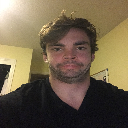

In [43]:
organic_test_img

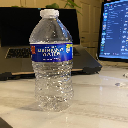

In [44]:
recycle_test_img

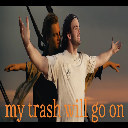

In [69]:
test

In [62]:
# convert img to a numpy array (see the eda.ipynb file use get_numpy_array function as example)
organic_img_array = np.asarray(organic_test_img) # you can do this
organic_img_array = organic_img_array.reshape((1,128,128,3))

recycle_img_array = np.asarray(recycle_test_img)
recycle_img_array = recycle_img_array.reshape((1,128,128,3))
images = np.concatenate([organic_img_array, recycle_img_array])
images.shape

(2, 128, 128, 3)

In [46]:
# load the model (simple_model) copy that exact code here 
# model = "simple_model.hdf5"
model = Sequential()
model.add(Dense(32,input_shape=(128,128,3),activation='relu'))
model.add(Flatten())
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam')

In [47]:
# compile model 
model.load_weights('models/simple_model.hdf5')



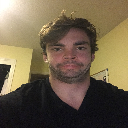

In [48]:
organic_test_img

In [67]:
# img_array = img_array.reshape((1,128,128,3))
pred = model.predict(images)
# pred = np.argmax(pred, axis = 0)
pred
# labels[pred[0]]

array([[0., 1.],
       [1., 0.]], dtype=float32)

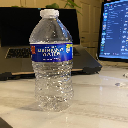

In [59]:
recycle_test_img

In [65]:
labels[pred[1]]

'organic'

In [80]:
pred = model.predict(test)
pred = np.argmax(pred, axis = 1)
pred
labels[pred[0]]

'organic'

In [37]:
for prediction in pred:
    print(labels[prediction])

organic
recyclable
